In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
boat_data = pd.read_csv(r'/Users/aaronreese/Desktop/Boat Data Project/2. Data/Original Data/boat_data_clean.csv', 
                 index_col = False)

# Data Cleaning

### Addressing Mixed Type Variables

In [3]:
boat_data.dtypes

GBP Price                      float64
USD Price                      float64
Manufacturer                    object
Condition                       object
Fuel                            object
Year Built                     float64
Length (Meters)                float64
Width (Meters)                 float64
Material                        object
Country Sold In                 object
Number of views last 7 days      int64
dtype: object

In [4]:
boat_data['Year Built'] = boat_data['Year Built'].astype(str)

In [16]:
boat_data.dtypes

GBP Price                      float64
USD Price                      float64
Manufacturer                    object
Condition                       object
Fuel                            object
Year Built                      object
Length (Meters)                float64
Width (Meters)                 float64
Material                        object
Country Sold In                 object
Number of views last 7 days      int64
dtype: object

### Checking for Duplicates

In [17]:
df_dups = boat_data[boat_data.duplicated()]

In [18]:
df_dups

,GBP Price,USD Price,Manufacturer,Condition,Fuel,Year Built,Length (Meters),Width (Meters),Material,Country Sold In,Number of views last 7 days


### Missing Values

In [19]:
boat_data.isnull().sum()

GBP Price                         0
USD Price                         0
Manufacturer                   1338
Condition                        86
Fuel                           2228
Year Built                        0
Length (Meters)                   9
Width (Meters)                   56
Material                       1749
Country Sold In                  38
Number of views last 7 days       0
dtype: int64

In [20]:
# Despite the large number of missing data types, I plan to keep the rows they're in because they're still beneficial to the analysis.

# Descriptive Analysis

In [21]:
boat_data.head()

,GBP Price,USD Price,Manufacturer,Condition,Fuel,Year Built,Length (Meters),Width (Meters),Material,Country Sold In,Number of views last 7 days
0,2969.93,3712.41,Rigiflex power boats,NEW,NaN,2017.0,4.00,1.90,NaN,Switzerland,226
1,2966.50,3708.13,Terhi power boats,NEW,NaN,2020.0,4.00,1.50,Thermoplastic,Germany,75
2,3355.30,4194.13,Marine power boats,NEW,NaN,nan,3.69,1.42,Aluminium,Switzerland,124
3,2849.00,3561.25,Pioner power boats,NEW,NaN,2020.0,3.00,1.00,NaN,Denmark,64
4,2889.15,3611.44,Linder power boats,NEW,NaN,2019.0,3.55,1.46,Aluminium,Germany,58


In [22]:
boat_data.shape

(9888, 11)

In [23]:
boat_data.info

<bound method DataFrame.info of       GBP Price  USD Price           Manufacturer Condition      Fuel  \
0       2969.93    3712.41   Rigiflex power boats       NEW       NaN   
1       2966.50    3708.13      Terhi power boats       NEW       NaN   
2       3355.30    4194.13     Marine power boats       NEW       NaN   
3       2849.00    3561.25     Pioner power boats       NEW       NaN   
4       2889.15    3611.44     Linder power boats       NEW       NaN   
...         ...        ...                    ...       ...       ...   
9883    4361.00    5451.25    Sea Ray power boats      USED  Unleaded   
9884    3838.60    4798.25                    NaN       NEW       NaN   
9885    3824.15    4780.19  BlueCraft power boats       NEW  Unleaded   
9886    3655.00    4568.75      Whaly power boats       NEW       NaN   
9887    3364.20    4205.25    DarekCo power boats       NEW       NaN   

     Year Built  Length (Meters)  Width (Meters)       Material  \
0        2017.0         

In [24]:
print(boat_data['Country Sold In'].unique())

['Switzerland' 'Germany' 'Denmark' 'Italy' 'France' 'UK' 'Spain' 'Austria'
 'Netherlands' 'Slovenia' 'Serbia' 'Belgium' 'Slovakia' 'Croatia'
 'Portugal' 'Malta' 'Montenegro' 'Latvia' 'Greece' 'Poland' 'Vienna'
 'Turkey' 'US' 'Finland' 'Hungry' nan 'Cyprus' 'Czech Republic' 'Sweden'
 'Lithuania' 'Ukraine' 'French Southern Territories' 'Estonia' 'Monaco'
 'Russia' 'Egypt' 'United Arab Emirates' 'Australia' 'Bulgaria'
 'Philippines' 'Taiwan' 'Thailand' 'Venezuela' 'Ireland' 'Norway'
 'Seychelles' 'Morocco' 'Lebanon' 'Hungary' 'Romania']


In [25]:
boat_data.describe()

,GBP Price,USD Price,Length (Meters),Width (Meters),Number of views last 7 days
count,9.888000e+03,9.888000e+03,9879.000000,9832.000000,9888.000000
mean,2.578635e+05,3.223293e+05,11.570017,3.520124,149.160801
std,8.260392e+05,1.032549e+06,6.002820,1.220534,151.819752
min,2.728000e+03,3.410000e+03,1.040000,0.010000,13.000000
25%,3.655000e+04,4.568750e+04,7.470000,2.540000,70.000000
50%,7.948807e+04,9.936010e+04,10.280000,3.330000,108.000000
75%,2.116425e+05,2.645531e+05,13.930000,4.250000,172.000000
max,2.635000e+07,3.293750e+07,100.000000,25.160000,3263.000000


## Outliers

### USD Price

<Axes: xlabel='USD Price', ylabel='USD Price'>

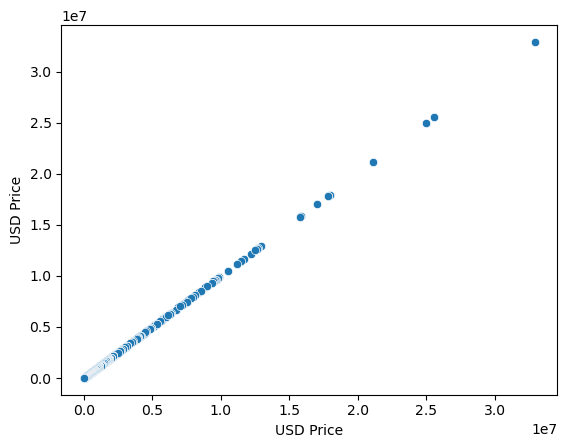

In [27]:
sns.scatterplot(x = 'USD Price', y = 'USD Price',data = boat_data)

### Length

<Axes: xlabel='Length (Meters)', ylabel='Length (Meters)'>

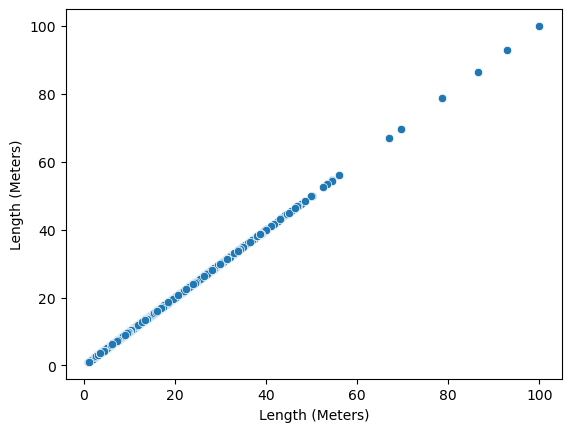

In [28]:
sns.scatterplot(x = 'Length (Meters)', y = 'Length (Meters)',data = boat_data)

### Width

<Axes: xlabel='Width (Meters)', ylabel='Width (Meters)'>

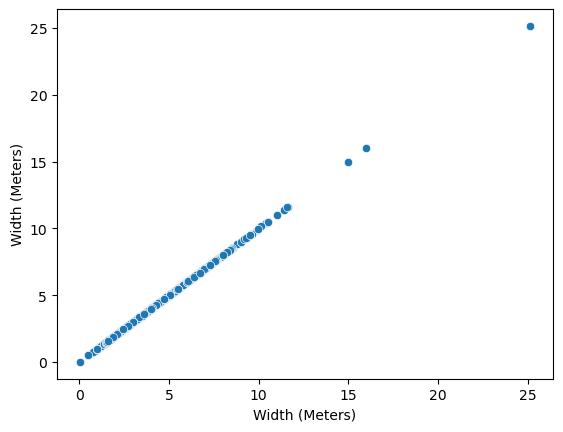

In [29]:
sns.scatterplot(x = 'Width (Meters)', y = 'Width (Meters)',data = boat_data)

### Number of views last 7 days

<Axes: xlabel='Number of views last 7 days', ylabel='Number of views last 7 days'>

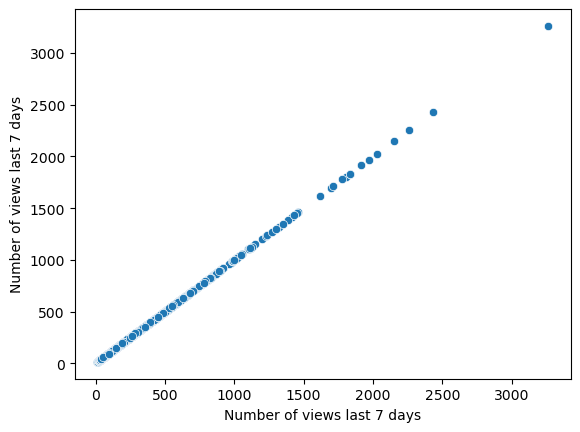

In [30]:
sns.scatterplot(x = 'Number of views last 7 days', 
                y = 'Number of views last 7 days',data = boat_data)

# Export

In [31]:
boat_data.to_csv('/Users/aaronreese/Desktop/Boat Data Project/2. Data/Prepared Data/boat_data_final.csv')